# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.stats.weightstats as statsmodel
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
black = data[data.race=='b'].call
white = data[data.race=='w'].call

In [7]:
data[data.race=='b'].describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.616016,3.658316,7.829569,0.051335,0.414374,0.101848,0.445996,216.744969,3.487885,0.560986,...,0.106776,0.437372,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.733060,1.219150,5.010764,0.220725,0.492715,0.302511,0.497177,148.021857,2.043125,0.496369,...,0.308889,0.496160,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data[data.race=='w'].describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,...,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,3.620945,3.664476,7.856263,0.054209,0.408624,0.092402,0.450103,214.530595,3.475154,0.558111,...,0.106776,0.436961,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.696609,1.219345,5.079228,0.226477,0.491681,0.289653,0.497606,148.255302,2.033334,0.496714,...,0.308889,0.496116,0.259681,0.275874,0.171693,0.278955,0.410183,0.442879,0.361809,0.371337
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,26.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1) What test is appropriate for this problem? Does CLT apply?

Because we are comparing the callback rates for white vs black-sounding names this is a mean comparison problem. We have over 30 samples from each group so CLT applies. We do not know the population standard deviation for callbacks for either group so the t-test is appropriate.

In [9]:
# 2435 observations for both races
data.groupby('race').size()

race
b    2435
w    2435
dtype: int64

In [10]:
# Observed difference of ~.03 in mean callback rates
data.groupby('race').mean().call

race
b    0.064476
w    0.096509
Name: call, dtype: float32

# 2) What are the null and alternate hypotheses?

- Null Hypothesis: Population mean of black-sounding name callbacks is equivalent to that of white-sounding names

- Alternate Hypothesis: Population mean of black-sounding name callbacks is lower than that of white-sounding names

#  3) Compute margin of error, confidence interval, and p-value.

In [11]:
[a,b] = statsmodel._tconfint_generic(data.call.mean(), data.call.std()/(len(data)**(1/2)), (len(data) - 1), .05, alternative = 'two-sided')
print('Confidence Interval: ')
print([a, b])
print('Margin of Error: ')
print((b-a)/2)


Confidence Interval: 
[0.072849404252293096, 0.088136229478595271]
Margin of Error: 
0.00764341261315


In [12]:
[x,p,y] = statsmodel.ttest_ind(black, white, alternative = 'smaller', usevar = 'pooled', value = 0)
print('P-value')
print(p)

P-value
1.97040142838e-05


# 4) Write a story describing the statistical significance in the context of the original problem

The observed difference in mean callback rates between the sample of candidates with white-sounding vs black-sounding names is about 3%, meaning that candidates with white-sounding names have a ~3% advantage in getting a callback. This difference was found to be significant at an alpha level of .01 with a p-value less than .001.

The primary limitation of the analysis performed is the lack of robust control against other factors in the data such as experience, eductation, etc. To present this conclusion, a robust analysis of all factors needs to be performed. During this analysis other factors were explored using the describe method but statistical and correlation testing was not performed on other factors.

# 5) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Because the analysis performed did not examine all factors that influence callback success, I would need to perform additional correlation testing to find the influences of other factors.

In the analysis performed, other factors were only examined for the assumption of equivalent samples (if one group is more experienced, educated, etc. then that could influence callbacks).

In order to test the factors that influence callback success correlation tests should be performed on various factors.

In [13]:
data_plot = data.loc[:,('yearsexp', 'call', 'education')]
data_plot.head()

,yearsexp,call,education
0,6,0.0,4
1,6,0.0,3
2,6,0.0,4
3,6,0.0,3
4,22,0.0,3


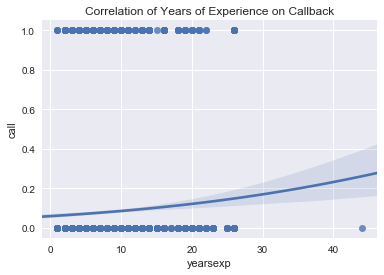

In [16]:
# Example of factor that appears to be correlated with callback rate
sns.regplot(x = 'yearsexp', y= 'call', data = data_plot, logistic = True)
plt.title('Correlation of Years of Experience on Callback')